In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

import os

In [15]:
dir = './data/Dataset/train/'

for folder in os.listdir(dir):
  print('Number for files in '+folder+'=',len(os.listdir(dir+folder)))

for folder in os.listdir(dir):
  for file in os.listdir(dir+folder+'/Label')[:5]:
    print(dir+folder+'/Label'+'/'+file)

Number for files in Bottle= 2501
Number for files in Chair= 2501
Number for files in Computer keyboard= 2501
Number for files in Computer monitor= 2501
Number for files in Computer mouse= 623
Number for files in Corded phone= 353
Number for files in Desk= 2508
Number for files in Headphones= 1065
Number for files in Microphone= 2501
Number for files in Mobile phone= 2501
Number for files in Mug= 1599
Number for files in Office building= 2501
Number for files in Office supplies= 1287
Number for files in Table= 2501
Number for files in Tablet computer= 785
Number for files in Telephone= 222
Number for files in Television= 2496
Number for files in Whiteboard= 900
./data/Dataset/train/Bottle/Label/00037418480b82d5.txt
./data/Dataset/train/Bottle/Label/000a42c09609c847.txt
./data/Dataset/train/Bottle/Label/000a514fb1546570.txt
./data/Dataset/train/Bottle/Label/001104017c708fa4.txt
./data/Dataset/train/Bottle/Label/001275e2a5ce462a.txt
./data/Dataset/train/Chair/Label/000497c81f04d99d.txt
./

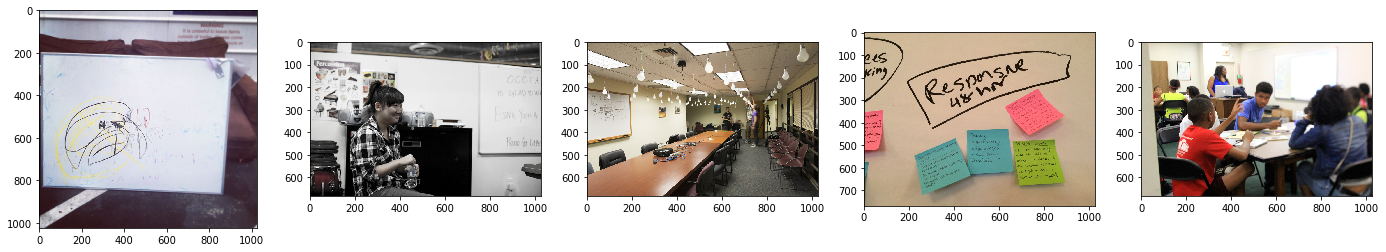

In [10]:
classes = ["Bottle", "Chair", "Computer keyboard" , "Computer monitor", "Computer mouse", "Corded phone", "Desk", "Headphones", "Microphone", "Mobile phone", "Mug", "Office building", "Office supplies" , "Table", "Tablet computer", "Telephone", "Television", "Whiteboard"]
fig, axarr = plt.subplots(1, 5, figsize=(24, 4))
for img_class in classes:
    for i, img in enumerate(os.listdir('./data/Dataset/train/' + img_class+'/')[:5]):
        axarr[i].imshow(imread('./data/Dataset/train/' + img_class+'/' + img))

In [ ]:
#Convert annotation files
import os
import os.path
from pathlib import Path
from subprocess import check_output
currdir = os.getcwd()
print(currdir)
source =Path('./data/Dataset/train')
script_path = Path( './OIDv4_to_VOC-master/OIDv4_to_VOC.py')
#source = os.path.join("data", "Dataset", "train")

for folder in os.listdir(source):
    target = f'{source}/{folder}'
    output = check_output(["python", script_path , "--sourcepath" , f"{source}/{folder}", "--dest_path", f"{target}"])   

In [ ]:
import pandas as pd 

kwargs = {'header': None, 'names': ['LabelID', 'LabelName']}
class_names = pd.read_csv("../data/csv_folder/image-class-names.csv", **kwargs)
train_boxed = pd.read_csv("../data/csv_folder/train-annotations-bbox.csv", index_col=0)
image_ids = pd.read_csv("../data/metadata/train-images-ids.csv", index_col=0)
label_map = dict(class_names.set_index('LabelName').loc[categories, 'LabelID']
                 .to_frame().reset_index().set_index('LabelID')['LabelName'])
label_values = set(label_map.keys())
relevant_training_images = train_boxed[train_boxed.LabelName.isin(label_values)]
relevant_flickr_urls = (relevant_training_images.set_index('ImageID')
                        .join(image_ids.set_index('ImageID'))
                        .loc[:, 'OriginalURL'])
relevant_flickr_img_metadata = (relevant_training_images.set_index('ImageID').loc[relevant_flickr_urls.index]
                                .pipe(lambda df: df.assign(LabelValue=df.LabelName.map(lambda v: label_map[v]))))


In [ ]:
#crop imagaes based on bounding box and label information
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import os
